#Toy Data:

In [11]:
import jax.numpy as jnp
from jax import vmap


p = jnp.array([0.2, 0.3, 0.5])
q = jnp.array([0.1, 0.4, 0.5])
pxy = jnp.array([[0.1, 0.1, 0.2], [0.05, 0.15, 0.1], [0.05, 0.15, 0.3]])


##i) The cross-entropy of two probability distributions is a measure of how    dissimilar they are. The cross-entropy of p with regard to q is defined as follows for two probability distributions p and q over the same collection of events:

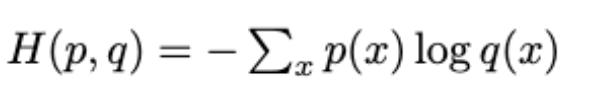

In [12]:
def cross_entropy(p, q):
    return -jnp.sum(p * jnp.log(q))

ce = cross_entropy(p, q)
print("Cross-entropy: ", ce)


Cross-entropy:  1.0819778


##ii) Entropy is a measure of the uncertainty or randomness of a probability distribution. The entropy of a probability distribution p over a set of events X is defined as:

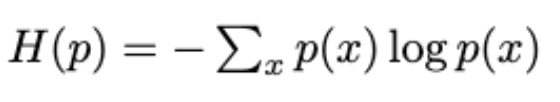

In [13]:
def entropy(p):
    return -jnp.sum(p * jnp.log(p))

h = entropy(p)
print("Entropy: ", h)

Entropy:  1.0296531


## iii) Mutual information is a measure of the amount of information that two random variables share. Given two random variables X and Y with probability distributions p(x, y), the mutual information between X and Y is defined as:



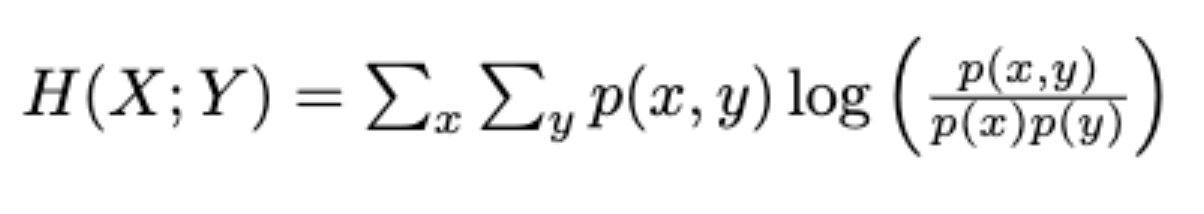

In [14]:
def mutual_information(p_xy):
    p_x = jnp.sum(p_xy, axis=1)
    p_y = jnp.sum(p_xy, axis=0) 
    p_x = p_x[:, jnp.newaxis] 
    p_y = p_y[jnp.newaxis, :] 
    mi = jnp.sum(p_xy * jnp.log(p_xy / (p_x * p_y)))
    return mi

mi = mutual_information(pxy)
print("Mutual information: ", mi)

Mutual information:  -0.17338325


## iv) Conditional entropy is a measure of the uncertainty of a random variable given the value of another random variable. Given two random variables X and Y with joint distribution p(x, y), the conditional entropy of X given Y is defined as:

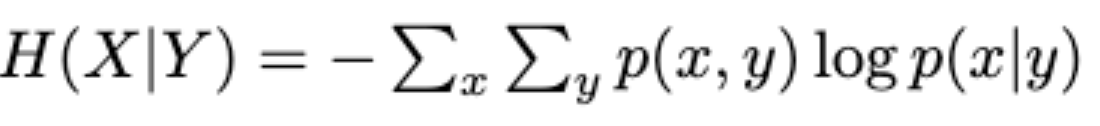

In [15]:
def joint_entropy(p_xy):
    return -jnp.sum(p_xy * jnp.log(p_xy))
    
def conditional_entropy(p_xy):
    p_y = jnp.sum(p_xy, axis=0)
    h_xy = joint_entropy(p_xy)
    h_y_given_x = jnp.sum(p_xy * jnp.log(p_xy / p_y[jnp.newaxis, :]))
    return h_xy - h_y_given_x
hxy_given_y = conditional_entropy(pxy)
print("Conditional entropy: ", hxy_given_y)


Conditional entropy:  3.4902291


## v) KL divergence: KL divergence (also known as relative entropy) is a measure of how different two probability distributions are. Given two probability distributions p and q over the same set of events, the KL divergence from p to q is defined as:

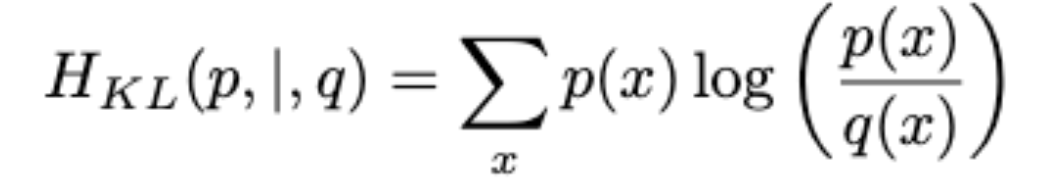

In [16]:
def kl_divergence(p, q):
    return jnp.sum(p * jnp.log(p / q))

kl = kl_divergence(p, q)
print("KL divergence: ", kl)

KL divergence:  0.05232481
